# Classification of Patients with Abnormal Blood Pressure

## Background

**Hypertension** with aging is a major medical concern even in this ultramodern era of advanced therapies. Preliminary testing is a key element in analyzing the procedures of mild abnormality of blood pressure for a substantial period of time, but presently has a limited value in the prediction of progression to hypertension. Although **hypotension**, low blood pressure in common parlance, is less common among the ones with abnormal blood pressure, but the adverse effect it has on their health is equivalent to that of hypertension.

Although recent studies have hypothesized that, keeping other factors constant, hemoglobin level is positively associated with blood pressure in a large cohort of healthy individuals, but genetic causes are also prominent in some of individuals. However, there are numerous other factors which determine whether an individual is likely to develop this abnormality.

Data scientists lay out the hypothesis that newer statistical classification methods derived from data mining and machine learning methods are capable of reducing the prediction error manifolds and help cardiologists to conduct a two-tailed preliminary prediction of abnormality of blood pressure in an individual.

## Objective

Employing statistical techniques, conduct a preliminary prognosis of Hypertension/hypotension, based on the level of **hemoglobin** and **genetic history** of the individual.

## Deliverables

- Lay out an approach plan, consisting of:
 - Your understanding of data, based on a preliminary exploratory analysis
 - Different traditional as well as state-of-the-art statistical techniques, which you are going to use to come up with different models to meet the objective
- Contrast the pros and cons of applying each technique on this problem
- Build a model using the most promising technique on the dataset. Model Validation is supposed to be done on the test dataset (to be given to you during your case-study presentation)
- What would be your approach, if there were other variables also in the data: Smoking, obesity (BMI), Lack of physical activity, salt content in the diet, alcohol consumption per day, Level of Stress, Age, Sex, Pregnancy, Chronic kidney disease and Adrenal & thyroid disorders.

## Data Dictionary

<div style="width:800px; height:800px">
![](./docs/data_dict.jpg)
</div>

## Report

### Reading Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

% matplotlib inline

As per the Objective we are only focusing on predicting `Blood_Pressure_Abnormality` using `Level_of_Hemoglobin` and `Genetic_Pedigree_Coefficient`. So, lets drop all other columns.

In [2]:
# read data
data = pd.read_csv('data/Training Data - Classification of Patients with Abnormal Blood Pressure (N=2000)_27-Jul-2016.csv')
data = data[['Blood_Pressure_Abnormality', 'Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient']]
data.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient
0,1,11.28,0.90
1,0,9.75,0.23
2,1,10.79,0.91
3,0,11.00,0.43
4,1,14.17,0.83


### EDA

#### Check for missing values

`Genetic_Pedigree_Coefficient` has some null values. Lets drop those.

In [3]:
data.isnull().any()

Blood_Pressure_Abnormality      False
Level_of_Hemoglobin             False
Genetic_Pedigree_Coefficient     True
dtype: bool

In [4]:
data = data.dropna()
data.shape

(1908, 3)

92 rows dropped.

#### Outlier Detection

`Genetic_Pedigree_Coefficient` has outlier values.

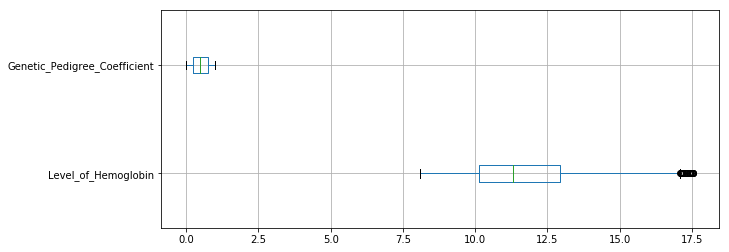

In [5]:
data.boxplot(column=['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient'], vert=False, figsize=(10, 4));

In [6]:
data = data[data['Level_of_Hemoglobin'] <= 17]
data.shape

(1877, 3)

31 rows dropped.

#### Class Distribution of Label

The class distribution among two labels is roughly balanced.

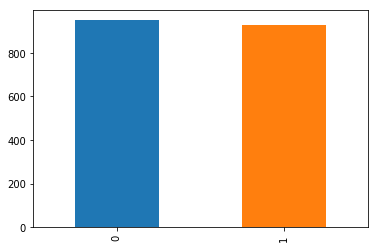

In [7]:
data['Blood_Pressure_Abnormality'].value_counts().plot('bar');

#### Data Distribution of Features

The data distribution of `Level_of_Hemoglobin` seems slightly right skewed. We may need to use log transform to correct that.  
The data distribution of `Genetic_Pedigree_Coefficient` is fairly normal.

#### Correlation

There is no obvious correlation between the two variables.

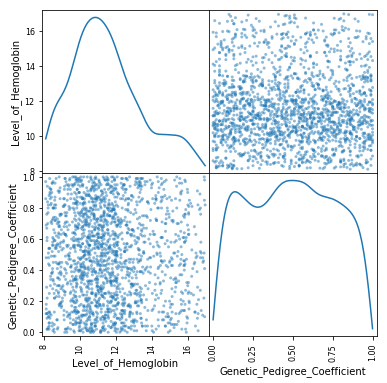

In [8]:
scatter_matrix(data[['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient']], figsize=(6, 6), diagonal='kde');

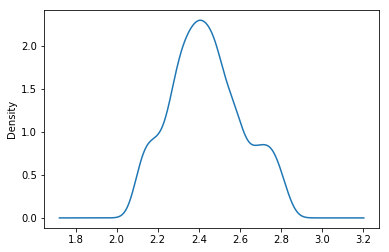

In [9]:
np.log(data['Level_of_Hemoglobin']).plot('kde');

#### Relation between features and labels

We can see that the data points for the two labels are linearly inseparble. But have almost clear separation in non-linear space.

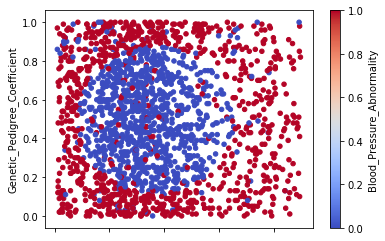

In [10]:
data.plot.scatter(x='Level_of_Hemoglobin',
                  y='Genetic_Pedigree_Coefficient',
                  c = 'Blood_Pressure_Abnormality',
                  colormap='coolwarm');

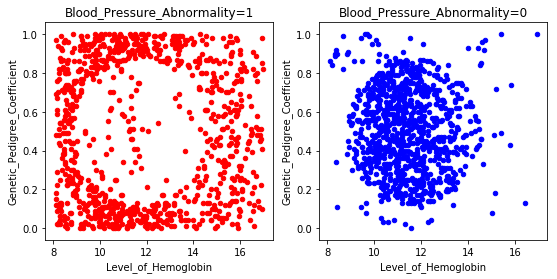

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
data[data['Blood_Pressure_Abnormality']==1].plot.scatter(x='Level_of_Hemoglobin',
                  y='Genetic_Pedigree_Coefficient',
                  c = 'Red', ax=axes[0], 
                  title = 'Blood_Pressure_Abnormality=1');
data[data['Blood_Pressure_Abnormality']==0].plot.scatter(x='Level_of_Hemoglobin',
                  y='Genetic_Pedigree_Coefficient',
                  c = 'Blue', ax=axes[1], 
                  title = 'Blood_Pressure_Abnormality=0');

#### Preliminary Conclusion

Patients having extreme levels of `Level_of_Hemoglobin` & `Genetic_Pedigree_Coefficient` are more likely to have `Blood_Pressure_Abnormality` than patients with moderate levels.

### Approach

Our objective is to use `Level_of_Hemoglobin` and `Genetic_Pedigree_Coefficient` to predict `Blood_Pressure_Abnormality` and thus the chance for hypertension/hypotension. The two classes for `Blood_Pressure_Abnormality` are:

- `0` - Normal
- `1` - Abnormal

As this is a binary classification problem and our classes are failry balanced, we will use `Accuracy` as our metric. 

Below is a list of classification algorithms that may be used to solve this problem.

- Logistic Regression
- Decision Trees
- Random Forest
- Support Vector Machine - Linear
- Support Vector Machine - Kernel
- Neural Nets
- K-Nearest Neigbours
- Boosted Trees

As we can see in the above plot, the classes are not linearly separable. So, Logistic Regression and Support Vector Machine - Linear will not work very well.

Given the small amount of data we have, Neural Nets and Boosted Trees will probably overfit. Though using Cross-validation may reduce the overfitting problem.

As we only have two feature columns Random Forest will not work properly.

Decision Trees, K-Nearest Neigbours and Support Vector Machine - Kernel algorithms seem the most suitable for this problem.

Although similar data points are clustered together and Decision Trees & K-Nearest Neigbours may work well with that, there are some outliers that may not be handled very well by either algorithm.

That leaves us with Support Vector Machine - Kernel. Although this may work best, it is also more computationaly expensive than Decision Trees & K-Nearest Neigbours.

### Data Preparation

Correct skewness of `Level_of_Hemoglobin`

In [12]:
data['Level_of_Hemoglobin'] = np.log(data['Level_of_Hemoglobin'])

Scale both features and separate labels

In [13]:
scaler = StandardScaler()
features = scaler.fit_transform(data.drop('Blood_Pressure_Abnormality', axis=1))
labels = data['Blood_Pressure_Abnormality']

Split training and validation sets

In [14]:
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.2)

### Modelling & Prediction

In [15]:
model = SVC(kernel='rbf')
model.fit(train_x, train_y)
output = model.predict(test_x)
accuracy = accuracy_score(test_y, output)
print(f'Accuracy: {accuracy}')

Accuracy: 0.898936170212766


### Approach - Extended Data

*What would be your approach, if there were other variables also in the data: Smoking, obesity (BMI), Lack of physical activity, salt content in the diet, alcohol consumption per day, Level of Stress, Age, Sex, Pregnancy, Chronic kidney disease and Adrenal & thyroid disorders.*

Steps to be followed:

- Clean (remove/impute) missing data.
- Find and remove any outliers.
- Normalize and Scale the continous features.
- Ideally, we would one-hot encode the categorical features, but here we only have binary and ordinal classes. So, one-hot encoding is not needed.
- Use a feature imporance algorithm like Random Forest to find the important features.
- Remove any unimportant features.
- With more features, we have more choice of models to choose from.
- Train multiple models and choose the best performing model.
- Use techniques like cross-validation and parameter grid-search if necessary.